In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib_inline.backend_inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use('./aux-files/custom_style_dark.mplstyle')
#matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

url = 'https://raw.githubusercontent.com/jmyers7/stats-book-materials/main/data/data-3-1.csv'
df = pd.read_csv(url, usecols=['area', 'price'])
df.describe()

area        price
count  2930.000000  2930.000000
mean   1499.690444   180.796060
std     505.508887    79.886692
min     334.000000    12.789000
25%    1126.000000   129.500000
50%    1442.000000   160.000000
75%    1742.750000   213.500000
max    5642.000000   755.000000

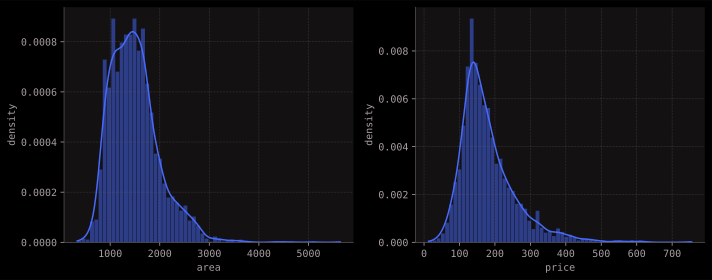

In [12]:
_, axes = plt.subplots(ncols=2, figsize=(10, 4))
sns.histplot(data=df, x='area', ax=axes[0], ec='black', stat='density', kde=True)
axes[0].set_ylabel('density')
sns.histplot(data=df, x='price', ax=axes[1], ec='black', stat='density', kde=True)
axes[1].set_ylabel('density')
plt.tight_layout()
#plt.savefig('histograms.pdf')

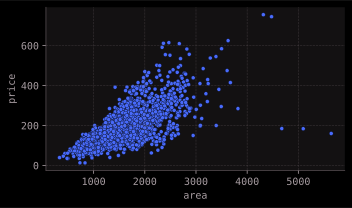

In [21]:
sns.scatterplot(data=df, x='area', y='price', ec='black')
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()
#plt.savefig('scatter.pdf')

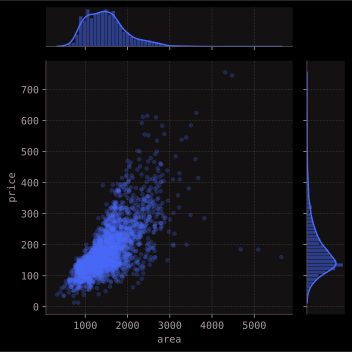

In [23]:
sns.jointplot(data=df, x='area', y='price', marginal_kws={'kde' : True, 'ec': 'black'}, ec=None, alpha=0.25)
plt.gcf().set_size_inches(w=5, h=5)
plt.tight_layout()
#plt.savefig('joint.pdf')

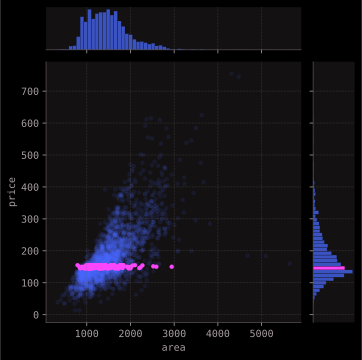

In [24]:
df_slice = df[(145 <= df['price']) & (df['price'] <= 155)]

g = sns.JointGrid()
sns.scatterplot(data=df, x='area', y='price', ax=g.ax_joint, alpha=0.1, ec=None)
sns.scatterplot(data=df_slice, x='area', y='price', ax=g.ax_joint, ec=None)
ax1 = sns.histplot(data=df, x='area', ax=g.ax_marg_x, ec='black')
ax2 = sns.histplot(data=df, y='price', ax=g.ax_marg_y, ec='black')

#for bar in ax2.patches:
    #bar.set_facecolor('black')
ax2.patches[11].set_facecolor('#FD46FC')

g.set_axis_labels(xlabel='area', ylabel='price')
plt.tight_layout()
plt.gcf().set_size_inches(w=5, h=5)
#plt.savefig('joint-2.pdf')

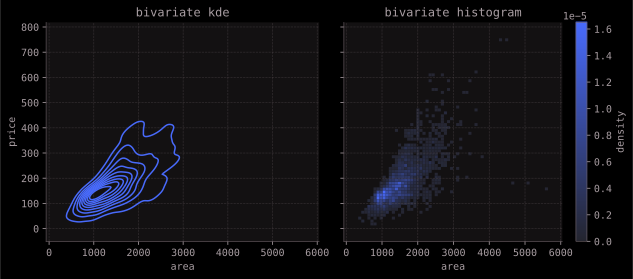

In [16]:
_, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True, sharex=True)

cmap = sns.dark_palette("#486AFB", as_cmap=True)

sns.kdeplot(data=df, x='area', y='price', ax=axes[0])
sns.histplot(data=df, x='area', y='price', cbar=True, ax=axes[1], cbar_kws={'label': 'density'}, stat='density', cmap=cmap)

axes[0].set_title('bivariate kde')
axes[1].set_title('bivariate histogram')
plt.tight_layout()
#plt.savefig('kde-hist.pdf')

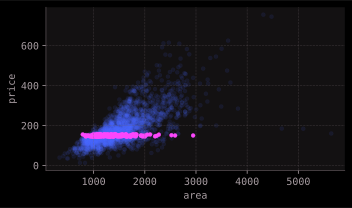

In [26]:
sns.scatterplot(data=df, x='area', y='price', alpha=0.1, ec=None)
sns.scatterplot(data=df_slice, x='area', y='price', ec=None)
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()
#plt.savefig('slice.pdf')

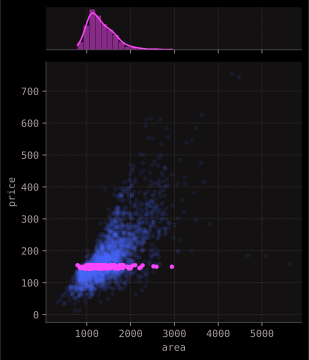

In [28]:
g = sns.JointGrid()
scatter = sns.scatterplot(data=df, x='area', y='price', ax=g.ax_joint, alpha=0.1, ec=None)
sns.scatterplot(data=df_slice, x='area', y='price', ax=g.ax_joint, ec=None)
sns.histplot(data=df_slice, x='area', ax=g.ax_marg_x, ec='black', color='#FD46FC', kde=True)

g.ax_marg_y.remove()
g.set_axis_labels(xlabel='area', ylabel='price')
plt.tight_layout()
plt.gcf().set_size_inches(w=5, h=5)
#plt.savefig('slice-2.pdf')

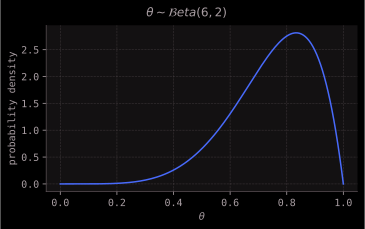

In [29]:
import scipy as sp

Theta = sp.stats.beta(a=6, b=2)
theta = np.linspace(0, 1, 150)

plt.plot(theta, Theta.pdf(theta))
plt.xlabel(r'$\theta$')
plt.ylabel('probability density')
plt.suptitle(r'$\theta \sim \mathcal{B}eta(6,2)$')
plt.tight_layout()
plt.gcf().set_size_inches(w=5, h=3)
#plt.savefig('prior.svg')

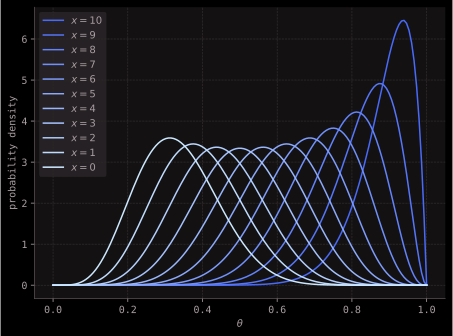

In [20]:
blues = sns.color_palette('blend:#cce8ff,#486afb', n_colors=11)

for x in range(10, -1, -1):
    Theta_posterior = sp.stats.beta(a=x + 6, b=12 - x)
    plt.plot(theta, Theta_posterior.pdf(theta), label=rf'$x={x}$', color=blues.as_hex()[x])

plt.xlabel(r'$\theta$')
plt.ylabel('probability density')
plt.legend()
plt.tight_layout()
#plt.savefig('posteriors.svg')